# Step 1. Imports

*   Import packages
*   Load dataset

### Import packages

In [139]:
pip install --upgrade scikit-learn joblib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 39.8 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
Note: you may need to restart the kernel to use updated packages.


In [2]:
conda update -n base -c defaults conda -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.11.1
  latest version: 24.1.2

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.1.2



## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-package-handling-2.2.0|   py39hecd8cb5_0         268 KB
    conda-package-streaming-0.9.0|   py39hecd8cb5_0          28 KB
    zstandard-0.19.0           |   py39h6c40b1e_0         452 KB
    ------------------------------------------------------------
                                           Total:         749 KB

The following NEW packages will be INSTALLED:

  conda-package-str~ pkgs/main/osx-64::conda-package-streaming-0.9

In [3]:
!conda install -c conda-forge sklearn-contrib-py-earth -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.11.1
  latest version: 24.1.2

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.1.2



## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - sklearn-contrib-py-earth


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-22.11.1              |   py39h6e9494a_1         874 KB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    sklearn-contrib-py-earth-0.1.0|   py39hbaf7cf3_3         1.3 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.1 MB

The following NEW packages will be INSTALLED:

  python

In [ ]:
pip install xgboost

In [216]:
pip install mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 25.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
from xgboost import XGBClassifier
from pyearth import Earth
from mlxtend.frequent_patterns import apriori, association_rules
import warnings

ModuleNotFoundError: No module named 'pandas'

### Load dataset

In [2]:
# Load the dataset
df = pd.read_csv("/Users/dhairyapatel/Desktop/survey lung cancer.csv")    # Change directory as needed

# Display the first few rows of the dataset
print(df.head())

  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                    2                      

### Rename columns

In [3]:
# Rename columns
df = df.rename(columns={'FATIGUE ':'FATIGUE', 'ALLERGY ': 'ALLERGY',
                          'CHRONIC DISEASE': 'CHRONIC_DISEASE',
                          'ALCOHOL CONSUMING': 'ALCOHOL_CONSUMING',
                          'SHORTNESS OF BREATH': 'SHORTNESS_OF_BREATH',
                          'SWALLOWING DIFFICULTY':'SWALLOWING_DIFFICULTY',
                          'CHEST PAIN': 'CHEST_PAIN'})

df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER'],
      dtype='object')

# Step 2. Exploratory Data Analysis (Initial EDA and data cleaning)

- Understand variables
- Clean dataset (missing data, redundant data, outliers)

### Gather descriptive statistics and basic information about the data

In [4]:
# Get summary statistics of numerical variables
print("\nSummary statistics of numerical variables:")
print(df.describe())


Summary statistics of numerical variables:
              AGE     SMOKING  YELLOW_FINGERS     ANXIETY  PEER_PRESSURE  \
count  309.000000  309.000000      309.000000  309.000000     309.000000   
mean    62.673139    1.563107        1.569579    1.498382       1.501618   
std      8.210301    0.496806        0.495938    0.500808       0.500808   
min     21.000000    1.000000        1.000000    1.000000       1.000000   
25%     57.000000    1.000000        1.000000    1.000000       1.000000   
50%     62.000000    2.000000        2.000000    1.000000       2.000000   
75%     69.000000    2.000000        2.000000    2.000000       2.000000   
max     87.000000    2.000000        2.000000    2.000000       2.000000   

       CHRONIC_DISEASE     FATIGUE     ALLERGY    WHEEZING  ALCOHOL_CONSUMING  \
count       309.000000  309.000000  309.000000  309.000000         309.000000   
mean          1.504854    1.673139    1.556634    1.556634           1.556634   
std           0.500787    0.

In [5]:
# Get basic information about the dataset
print("\nDataset information:")
print(df.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC_DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL_CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS_OF_BREATH    309 non-null    int64 
 13  SWALLOWING_DIFFICULTY  309 non-null    int64 
 14  CHEST_PAIN             309 non-null    int64 
 15  L

### Check missing values

In [6]:
# Check for missing values
print(df.isnull().sum())

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64


### Check duplicates

In [7]:
# Check for duplicate rows
print("\nDuplicate rows:")
print(df.duplicated().sum())


Duplicate rows:
33


###### 33 out of 309 rows contain duplicates. That is 10.75% of the data. It is unlikely each of the 33 data entries had the same values for each variable. Dropping these duplicates is the best approach

In [8]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)
print("\nDuplicate rows:")
print(df.duplicated().sum())


Duplicate rows:
0


In [9]:
df.shape

(276, 16)

###### After dropping duplicates, we have 276 rows in the dataset.

# Step 2. Exploratory Data Analysis (continued)

Explore distribution of numerical and categorical variables

In [10]:
# Get the distribution of the target variable (LUNG_CANCER)
print("\nDistribution of the target variable:")
print(df["LUNG_CANCER"].value_counts())
print(df["LUNG_CANCER"].value_counts(normalize=True))


Distribution of the target variable:
YES    238
NO      38
Name: LUNG_CANCER, dtype: int64
YES    0.862319
NO     0.137681
Name: LUNG_CANCER, dtype: float64


#### Data Imbalance
There are 6.3x as many positive cases as negative cases. Data is skewed towards positive cases. However, the models selected to analyse the dataset have techniques to mitigate the impact of imbalanced data, such as weighted training, oversampling, or ensemble methods.

### Visualize distribution of target variable ('LUNG_CANCER')

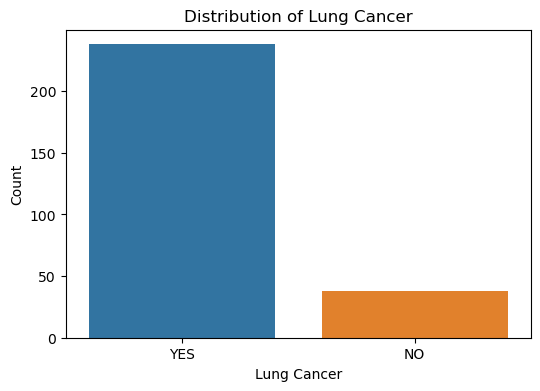

In [11]:
# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x="LUNG_CANCER", data=df)
plt.title("Distribution of Lung Cancer")
plt.xlabel("Lung Cancer")
plt.ylabel("Count")
plt.show()

### Visualize distribution of categorical variables

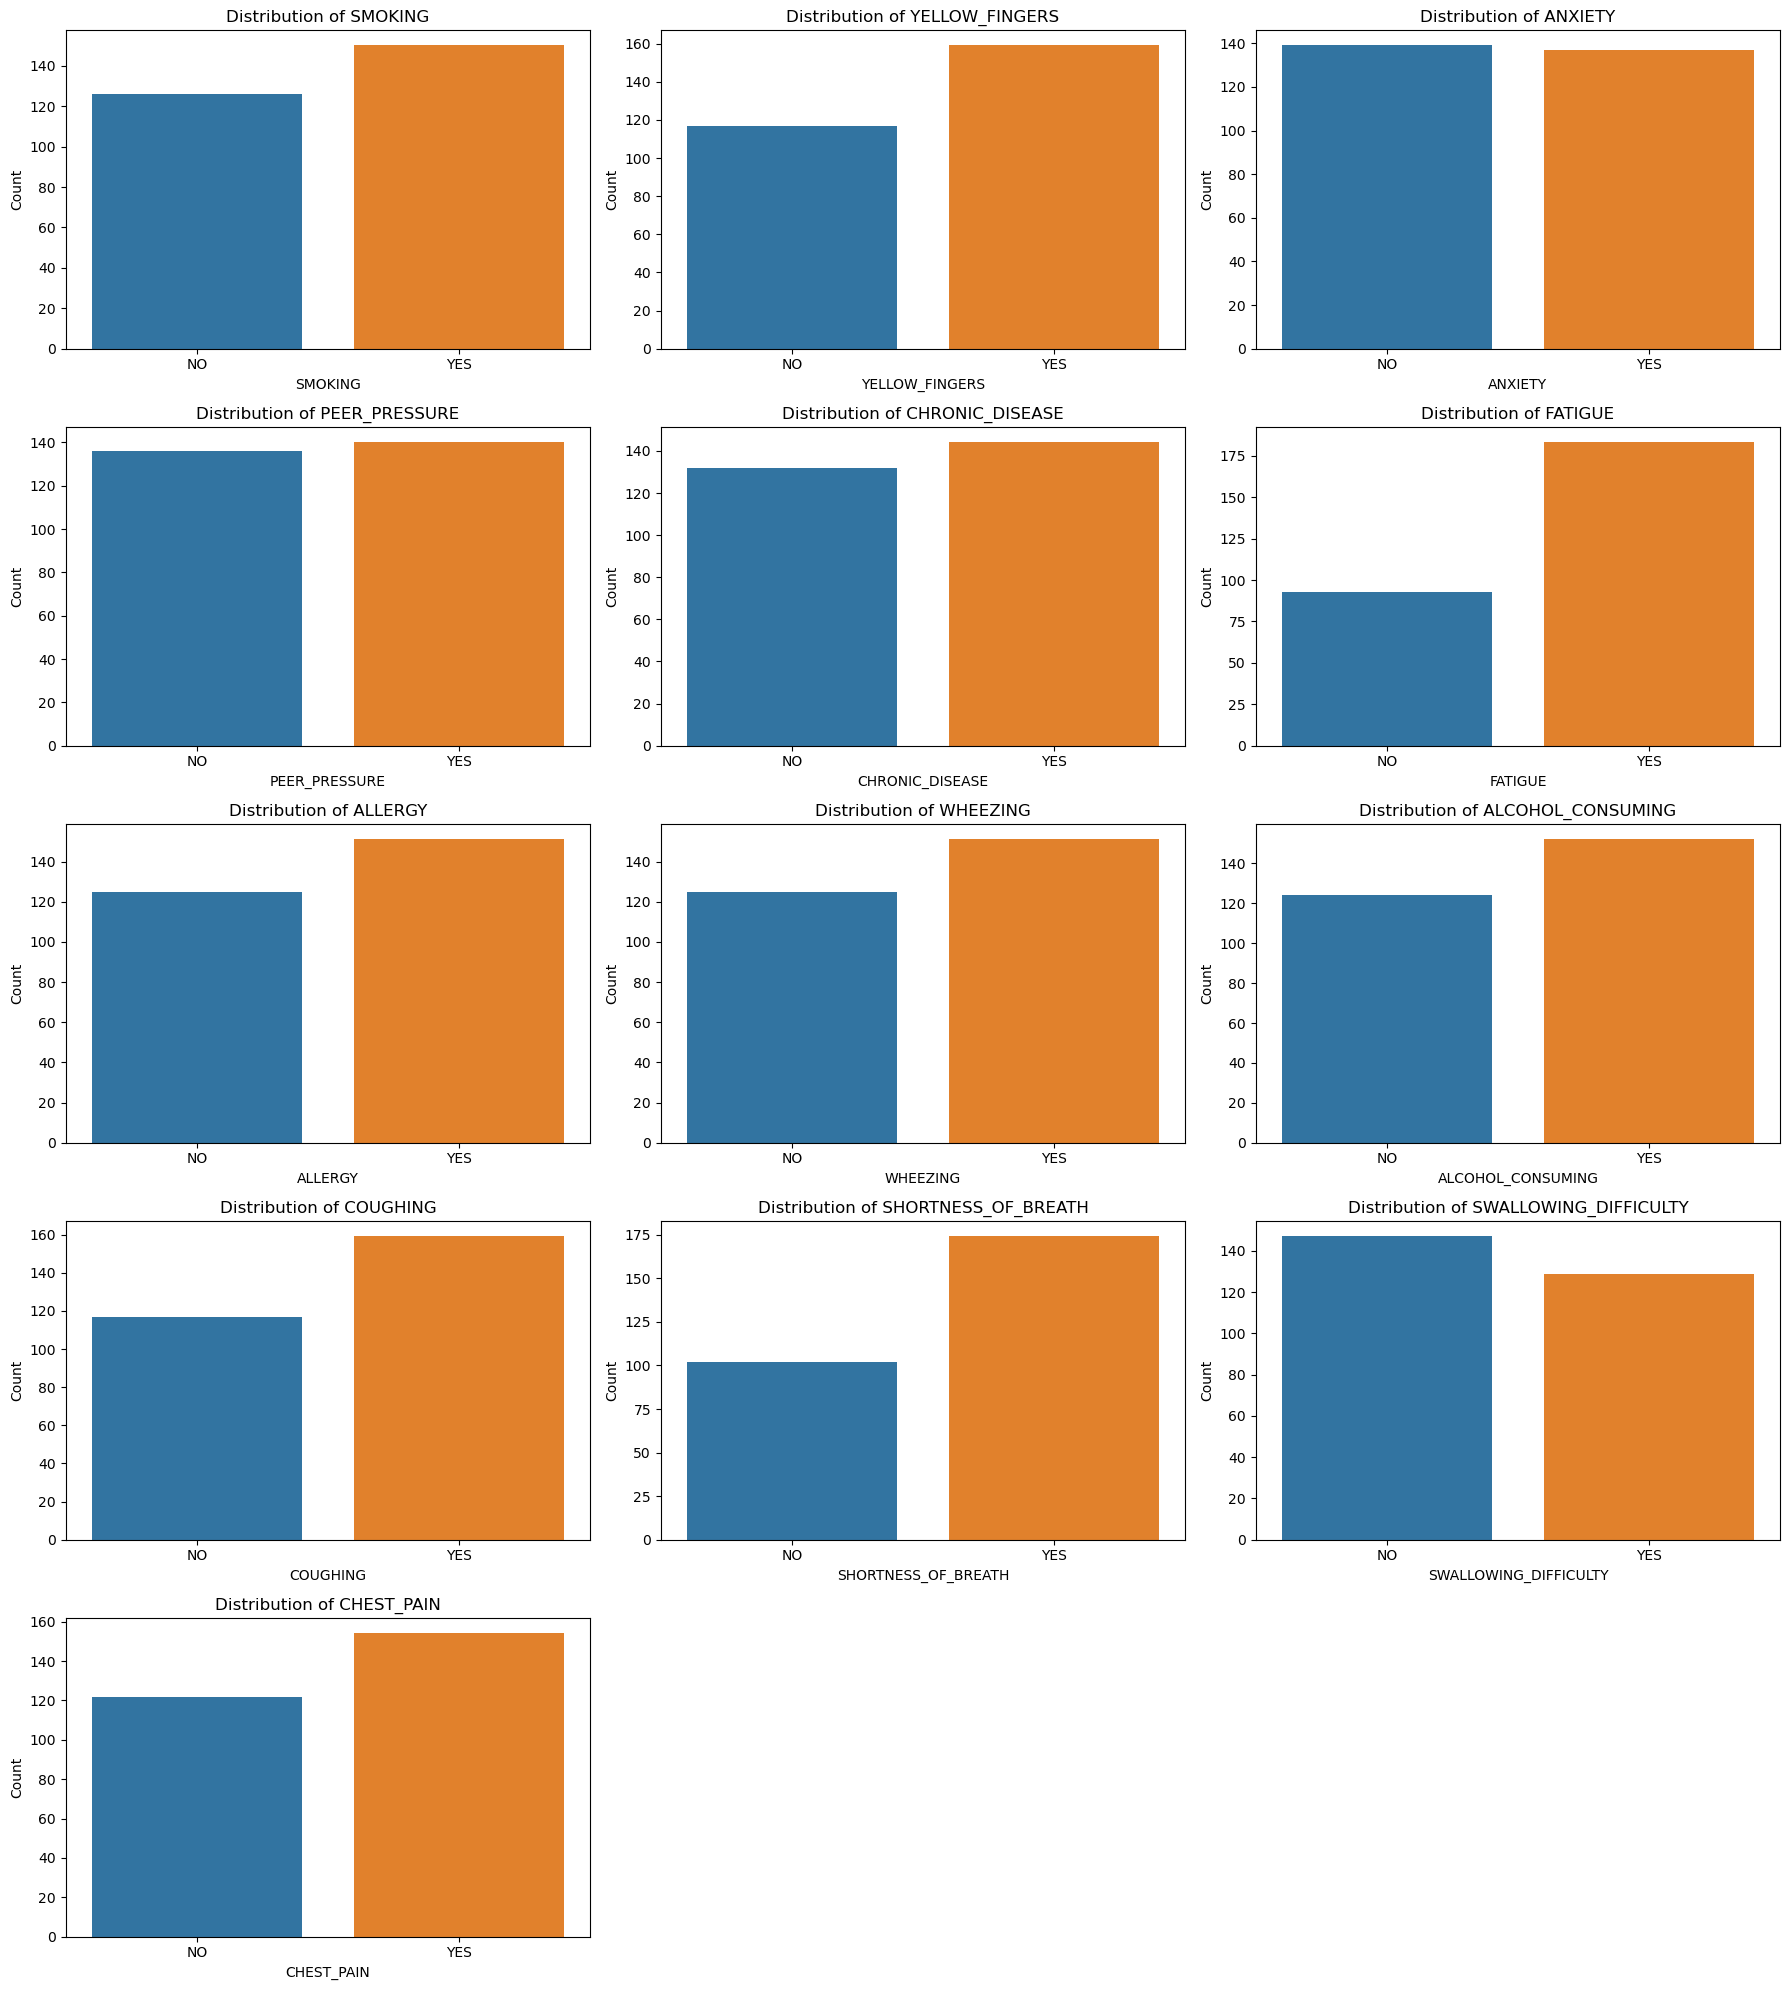

In [12]:
# Define the categorical variables
categorical_vars = ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY','PEER_PRESSURE', 
                    'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
                    'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
                    'SWALLOWING_DIFFICULTY', 'CHEST_PAIN']

# Create a mapping dictionary to replace 1 and 2 with "NO" and "YES"
mapping = {1: "NO", 2: "YES"}

# Create new columns with the mapped values
for var in categorical_vars:
    df[f"{var}_mapped"] = df[var].map(mapping)

# Set up the figure and axes
num_vars = len(categorical_vars)
num_cols = 3
num_rows = (num_vars + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 4))
axes = axes.flatten()

# Plot the countplots for each categorical variable
for i, var in enumerate(categorical_vars):
    sns.countplot(x=var, data=df, ax=axes[i])
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Count")
    axes[i].set_title(f"Distribution of {var}")
    axes[i].set_xticklabels(["NO", "YES"])

# Remove any unused axes
for i in range(num_vars, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### Visualize relationship between categorical variables and target variable

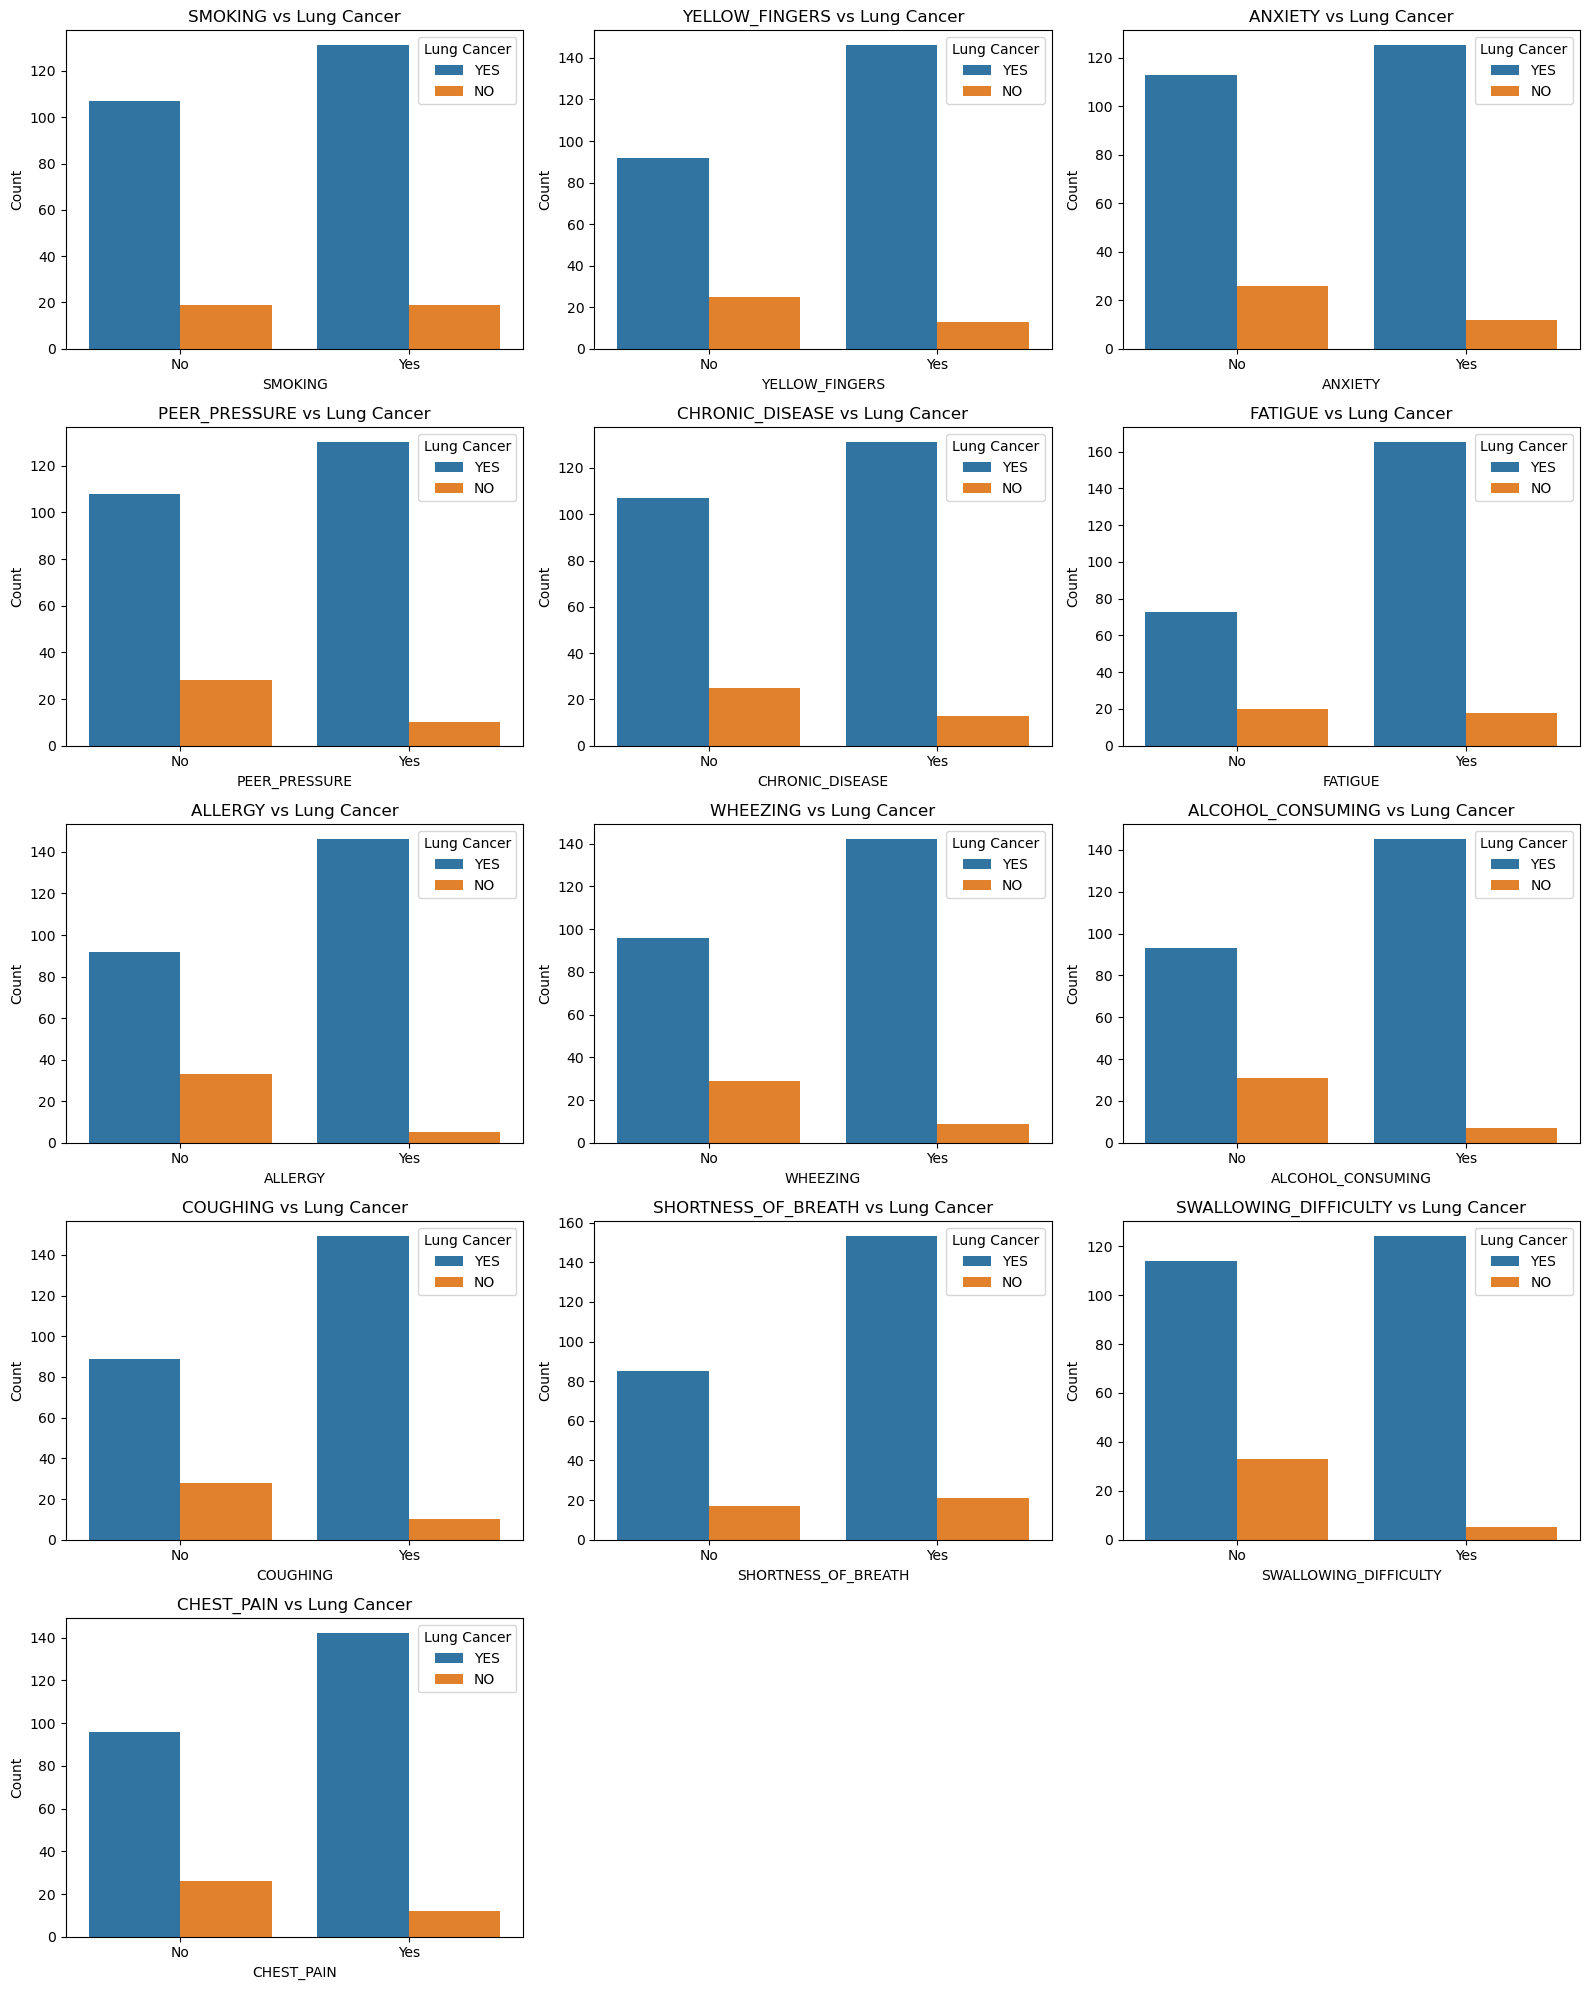

In [13]:
plt.figure(figsize=(16, 20))
warnings.filterwarnings('ignore')
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(5, 3, i)
    sns.countplot(x=var, hue="LUNG_CANCER", data=df)
    plt.title(f"{var} vs Lung Cancer")
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.legend(title="Lung Cancer", loc='upper right')
plt.tight_layout()
plt.show()

### Visualize distribution of numerical variable ('AGE')

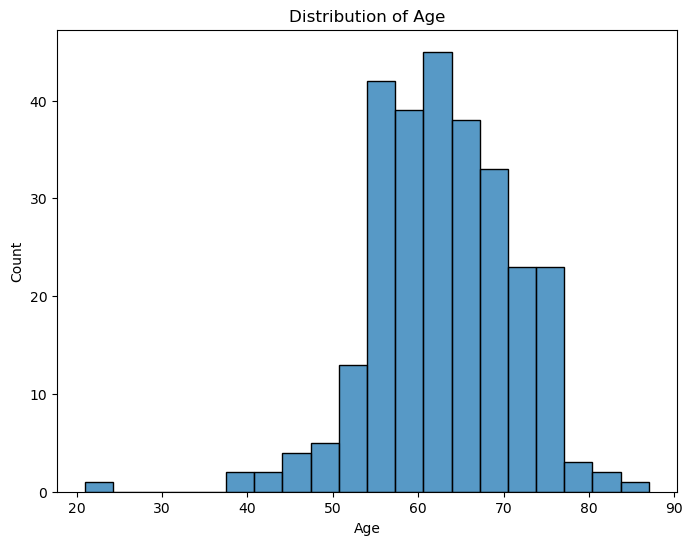

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(x='AGE', data=df)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

### Visualize relationship between 'AGE' and 'LUNG_CANCER'

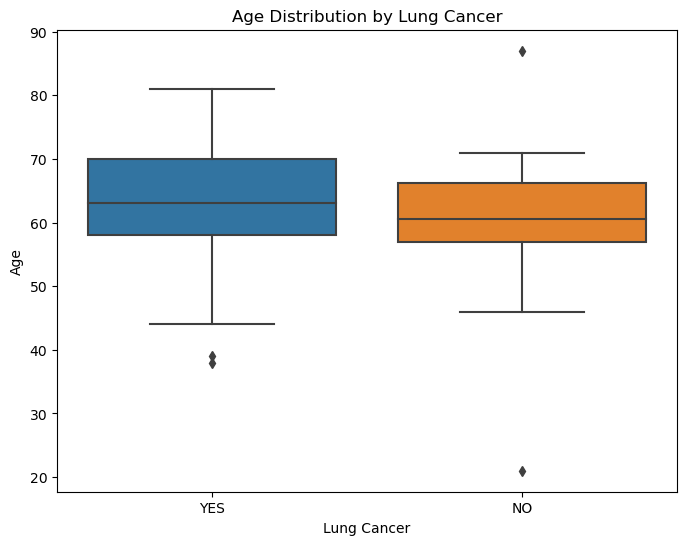

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="LUNG_CANCER", y='AGE', data=df)
plt.title("Age Distribution by Lung Cancer")
plt.xlabel("Lung Cancer")
plt.ylabel("Age")
plt.show()

### Age Distribution of Positive Cases by Gender

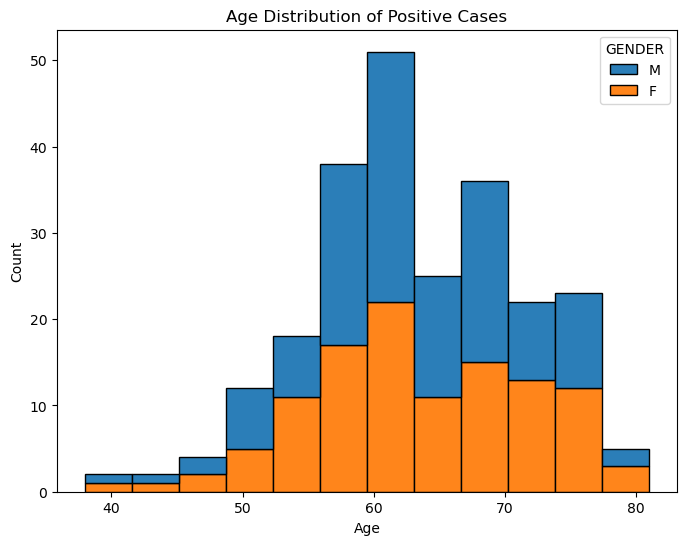

In [16]:
positive_cases = df[df["LUNG_CANCER"] == "YES"]
plt.subplots(figsize=(8, 6))
sns.histplot(data=positive_cases,x="AGE",hue="GENDER", multiple="stack", alpha=0.95 ,fill=True)
plt.title("Age Distribution of Positive Cases")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

### Gender-wise Positive Cases' Symptoms

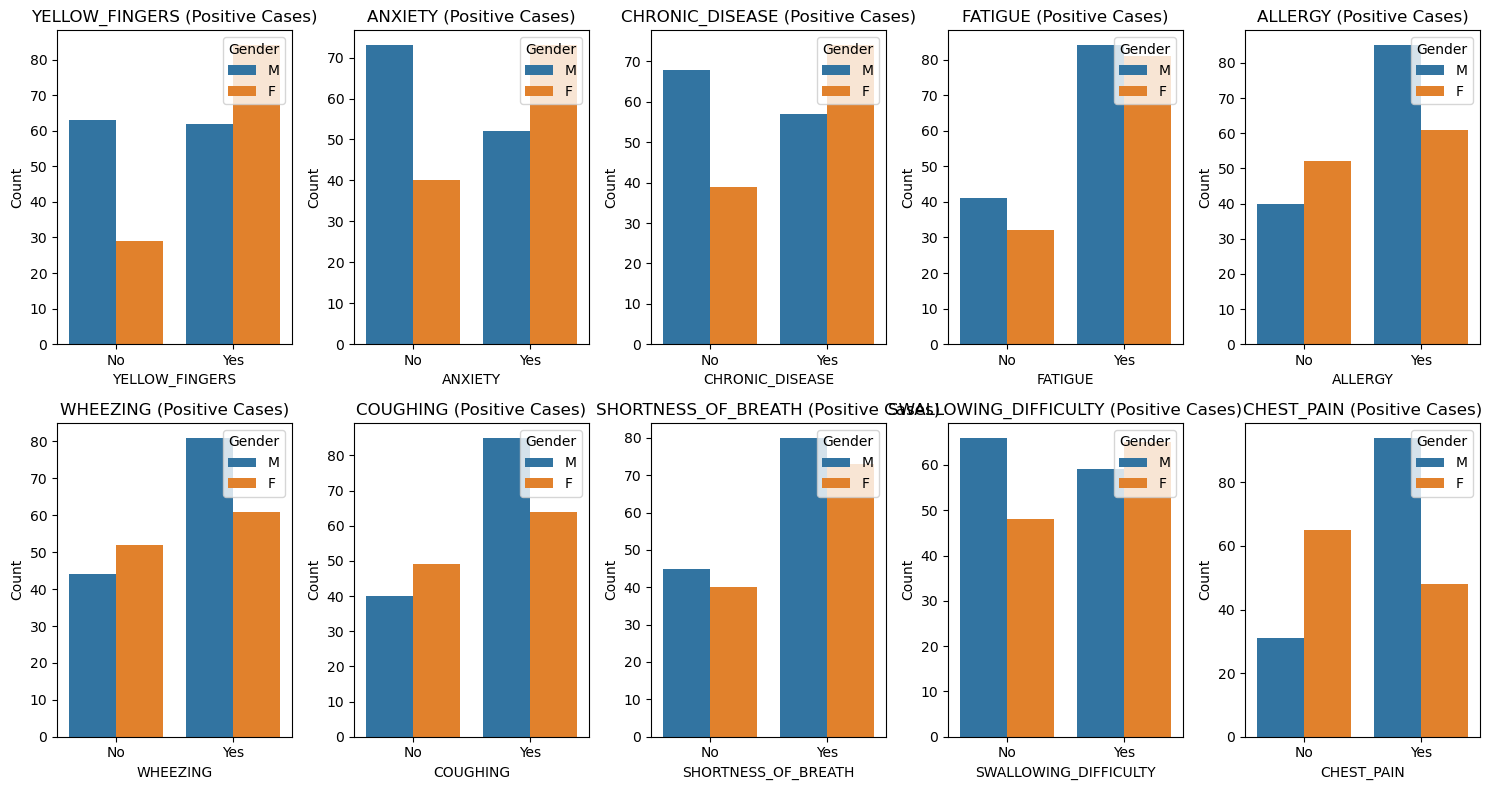

In [17]:
symptoms_vars = ['YELLOW_FINGERS', 'ANXIETY', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
                 'COUGHING', 'SHORTNESS_OF_BREATH', 'SWALLOWING_DIFFICULTY', 'CHEST_PAIN']
warnings.filterwarnings('ignore')
plt.figure(figsize=(15, 8))
for i, var in enumerate(symptoms_vars, 1):
    plt.subplot(2, 5, i)
    sns.countplot(x=var, hue="GENDER", data=positive_cases)
    plt.title(f"{var} (Positive Cases)")
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.legend(title="Gender", loc='upper right')
plt.tight_layout()
plt.show()

### Gender-wise Positive Cases' Reasons

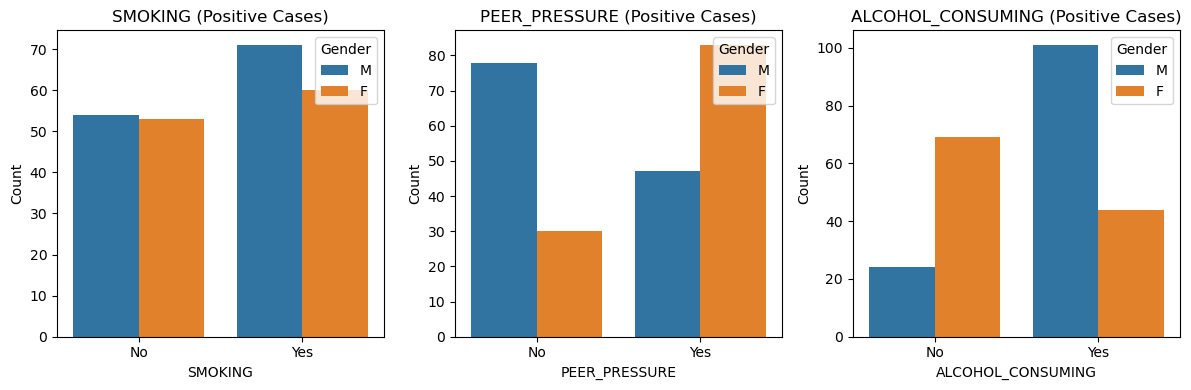

In [18]:
reasons_vars = ['SMOKING', 'PEER_PRESSURE', 'ALCOHOL_CONSUMING']
warnings.filterwarnings('ignore')
plt.figure(figsize=(12, 4))
for i, var in enumerate(reasons_vars, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=var, hue="GENDER", data=positive_cases)
    plt.title(f"{var} (Positive Cases)")
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.legend(title="Gender", loc='upper right')
plt.tight_layout()
plt.show()

### Encoding categorical variables

In [19]:
# Encode categorical variables
df["GENDER"] = df["GENDER"].map({"M": 0, "F": 1})
df["LUNG_CANCER"] = df["LUNG_CANCER"].map({"YES": 1, "NO": 0})
# Define the list of categorical variables
categorical_vars = ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
                    'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
                    'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
                    'SWALLOWING_DIFFICULTY', 'CHEST_PAIN']

# Create a mapping dictionary to replace 2 with 1 and 1 with 0
mapping = {2: 1, 1: 0}

# Iterate over each categorical variable and replace the values using the mapping
for var in categorical_vars:
    df[var] = df[var].map(mapping)
    
    
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,...,PEER_PRESSURE_mapped,CHRONIC_DISEASE_mapped,FATIGUE_mapped,ALLERGY_mapped,WHEEZING_mapped,ALCOHOL_CONSUMING_mapped,COUGHING_mapped,SHORTNESS_OF_BREATH_mapped,SWALLOWING_DIFFICULTY_mapped,CHEST_PAIN_mapped
0,0,69,0,1,1,0,0,1,0,1,...,NO,NO,YES,NO,YES,YES,YES,YES,YES,YES
1,0,74,1,0,0,0,1,1,1,0,...,NO,YES,YES,YES,NO,NO,NO,YES,YES,YES
2,1,59,0,0,0,1,0,1,0,1,...,YES,NO,YES,NO,YES,NO,YES,YES,NO,YES
3,0,63,1,1,1,0,0,0,0,0,...,NO,NO,NO,NO,NO,YES,NO,NO,YES,YES
4,1,63,0,1,0,0,0,0,0,1,...,NO,NO,NO,NO,YES,NO,YES,YES,NO,NO


### Visualize correlation between variables

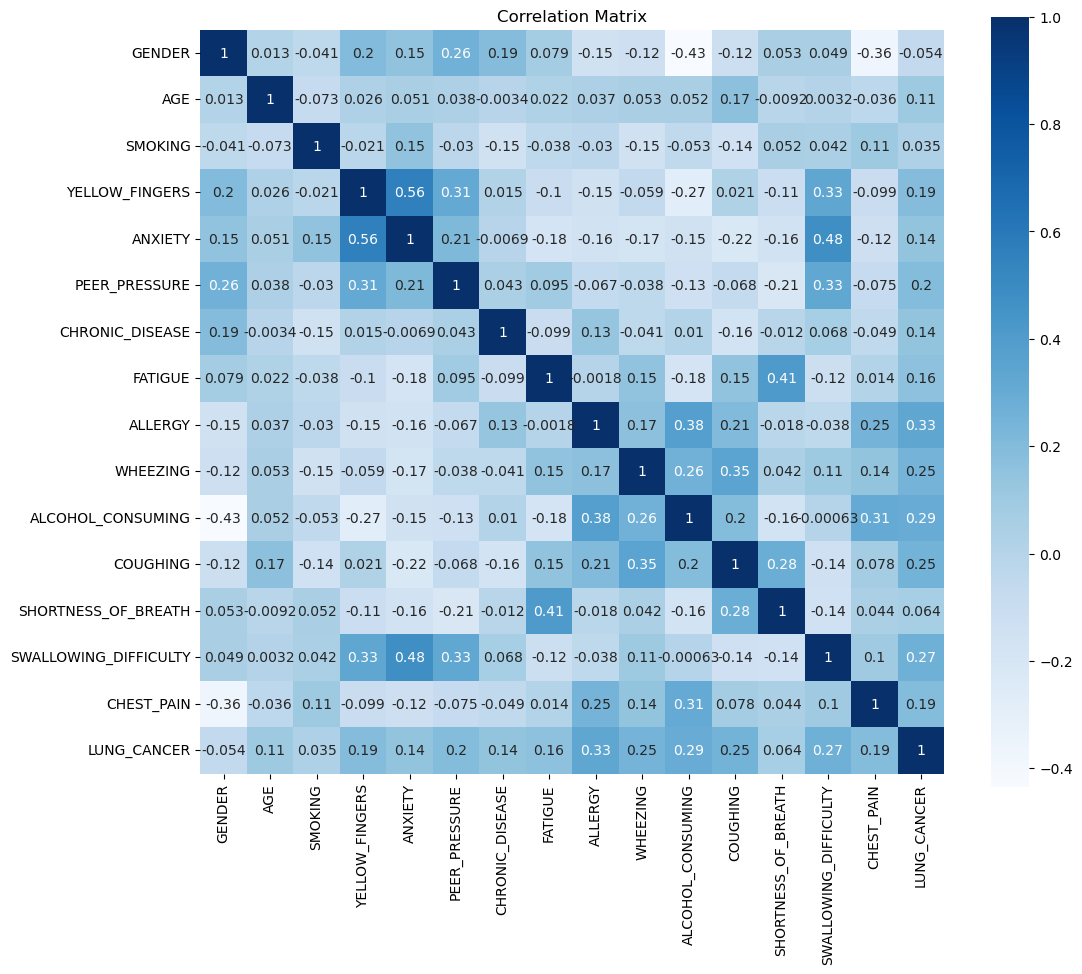

In [20]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="Blues", square=True)
plt.title("Correlation Matrix")
plt.show()

# Step 3. Model Building, Step 4. Results and Evaluation
- Fitting models that predict outcome variable using independent variables
- Check model assumptions
- Evaluate models

### Train-test split

In [21]:
# Split the data into features (X) and target variable (y)
X = df[['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN']]
y = df["LUNG_CANCER"]

In [100]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape, X_test.shape)

(220, 16) (56, 16)


### Logistic Regression

In [97]:
model = sm.Logit(y_train, X_train).fit()

# Print the model summary
print(model.summary())

# Add a constant term to the testing features (X_test)
X_test = sm.add_constant(X_test)

# Make predictions on the testing data using the fitted model
y_pred_prob = model.predict(X_test)

# Convert predicted probabilities to binary class labels
y_pred_class = [1 if p >= 0.5 else 0 for p in y_pred_prob]

# Calculate performance metrics on the testing data
accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)

# Print performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Optimization terminated successfully.
         Current function value: 0.140998
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:            LUNG_CANCER   No. Observations:                  249
Model:                          Logit   Df Residuals:                      233
Method:                           MLE   Df Model:                           15
Date:                Sun, 31 Mar 2024   Pseudo R-squ.:                  0.6463
Time:                        05:51:38   Log-Likelihood:                -35.108
converged:                       True   LL-Null:                       -99.262
Covariance Type:            nonrobust   LLR p-value:                 4.557e-20
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -5.8154      3.023     -1.924      0.054     -11.740       0

### Function to assign risk score based on predicted probabilities

In [23]:
# Function to calculate risk score based on predicted probabilities
def calculate_risk_score(probabilities):
    # Define the risk thresholds
    low_risk_threshold = 0.3
    medium_risk_threshold = 0.6
    
    # Get the probability of the positive class (lung cancer)
    lung_cancer_prob = probabilities[1]
    
    # Classify the risk based on the probability
    if lung_cancer_prob < low_risk_threshold:
        risk_category = "Low Risk"
    elif lung_cancer_prob < medium_risk_threshold:
        risk_category = "Medium Risk"
    else:
        risk_category = "High Risk"
    
    return lung_cancer_prob, risk_category

### Random Forest Model with Bootstrapping

Random Forest Accuracy: 0.9107142857142857
Random Forest Precision: 0.9387755102040817
Random Forest Recall: 0.9583333333333334
Random Forest F1-score: 0.9484536082474226
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.94      0.96      0.95        48

    accuracy                           0.91        56
   macro avg       0.83      0.79      0.81        56
weighted avg       0.91      0.91      0.91        56

Random Forest Confusion Matrix:


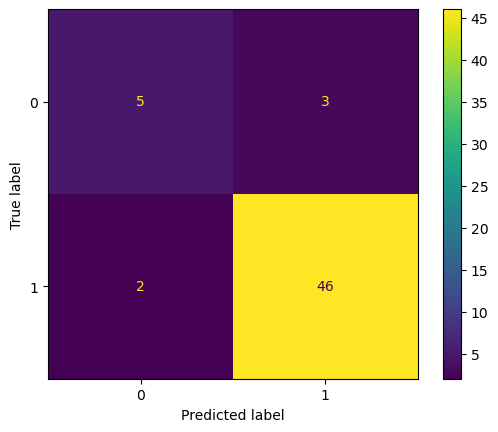

In [24]:
# Random Forest Model with Bootstrapping
rf = RandomForestClassifier(random_state=42,bootstrap=True)
rf_params = {
    "n_estimators": [100, 200, 500],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring="accuracy")
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_
y_pred_rf = rf_best.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Precision:", precision_score(y_test, y_pred_rf))
print("Random Forest Recall:", recall_score(y_test, y_pred_rf))
print("Random Forest F1-score:", f1_score(y_test, y_pred_rf))
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:")
rf_cm = confusion_matrix(y_test, y_pred_rf)
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm)
rf_disp.plot()

### Most important features in Random Forest

Feature Importances:
1. AGE (0.205589)
2. ALLERGY (0.085208)
3. ALCOHOL_CONSUMING (0.075288)
4. PEER_PRESSURE (0.069096)
5. FATIGUE (0.066996)
6. CHRONIC_DISEASE (0.064832)
7. YELLOW_FINGERS (0.064018)
8. WHEEZING (0.051591)
9. SHORTNESS_OF_BREATH (0.049912)
10. GENDER (0.047507)
11. SWALLOWING_DIFFICULTY (0.045847)
12. COUGHING (0.045339)
13. ANXIETY (0.045016)
14. CHEST_PAIN (0.044756)
15. SMOKING (0.039006)


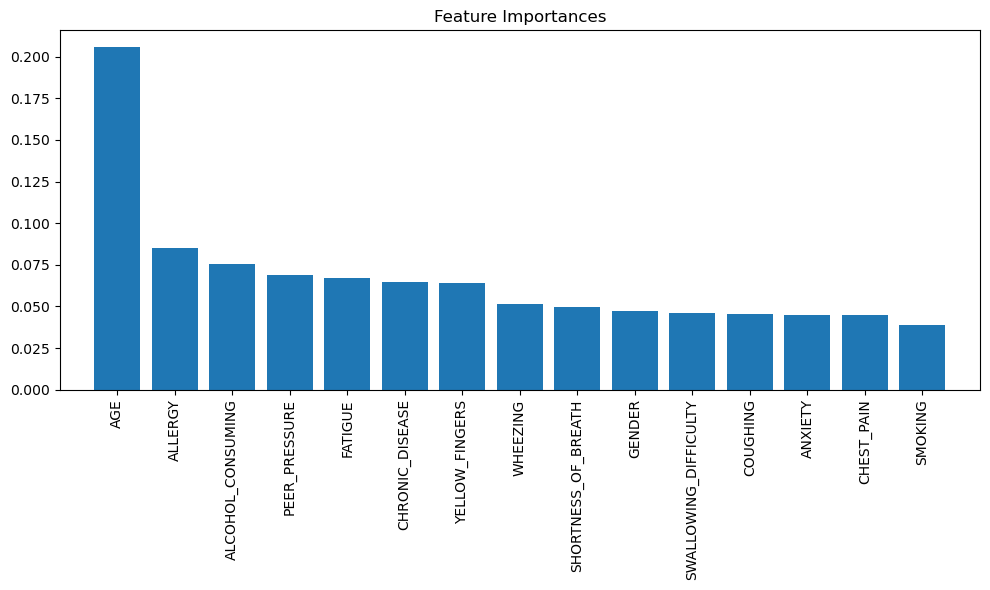

In [47]:
# Get the feature importances
importances = rf_best.feature_importances_

# Get the names of the features
feature_names = X.columns

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature importances
print("Feature Importances:")
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

### Assigning risk scores to patients based on predicted probabilities from Random Forest

In [25]:
# Predict probabilities for the test set
rf_probabilities = rf_best.predict_proba(X_test)

# Calculate risk scores for the test set
rf_risk_scores = [calculate_risk_score(prob) for prob in rf_probabilities]

# Get the actual values of "LUNG_CANCER" for the first 50 patients in the test set
actual_lung_cancer = y_test[:10].tolist()

# Print the risk scores and actual "LUNG_CANCER" values for the first 50 patients
print("Random Forest Risk Scores:")
for i in range(10):
    print(f"Patient {i+1}: Probability = {rf_risk_scores[i][0]}, Risk Category = {rf_risk_scores[i][1]}, Actual Lung Cancer = {actual_lung_cancer[i]}")

Random Forest Risk Scores:
Patient 1: Probability = 0.985, Risk Category = High Risk, Actual Lung Cancer = 1
Patient 2: Probability = 0.99, Risk Category = High Risk, Actual Lung Cancer = 1
Patient 3: Probability = 1.0, Risk Category = High Risk, Actual Lung Cancer = 1
Patient 4: Probability = 1.0, Risk Category = High Risk, Actual Lung Cancer = 1
Patient 5: Probability = 0.455, Risk Category = Medium Risk, Actual Lung Cancer = 0
Patient 6: Probability = 0.995, Risk Category = High Risk, Actual Lung Cancer = 1
Patient 7: Probability = 0.97, Risk Category = High Risk, Actual Lung Cancer = 1
Patient 8: Probability = 0.995, Risk Category = High Risk, Actual Lung Cancer = 1
Patient 9: Probability = 0.995, Risk Category = High Risk, Actual Lung Cancer = 1
Patient 10: Probability = 0.955, Risk Category = High Risk, Actual Lung Cancer = 1


### Multivariate Adaptive Regression Splines (MARS) Model

MARS Accuracy: 0.9107142857142857
MARS Precision: 0.9215686274509803
MARS Recall: 0.9791666666666666
MARS F1-score: 0.9494949494949495
MARS Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.50      0.62         8
           1       0.92      0.98      0.95        48

    accuracy                           0.91        56
   macro avg       0.86      0.74      0.78        56
weighted avg       0.90      0.91      0.90        56

MARS Confusion Matrix:


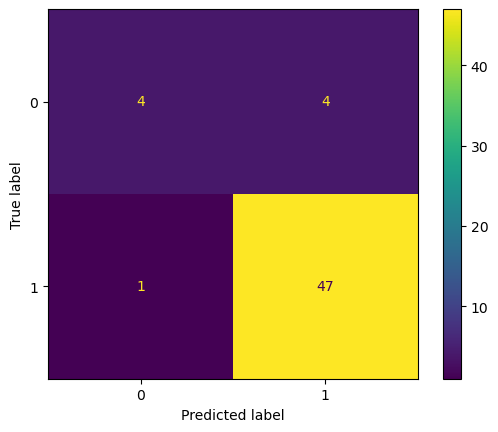

In [27]:
# MARS Model
mars = Earth()
warnings.filterwarnings('ignore')
mars_params = {
    "max_degree": [1, 2, 3],
    "penalty": [0.5, 1, 2]
}
mars_grid = GridSearchCV(mars, mars_params, cv=5, scoring="accuracy")
mars_grid.fit(X_train, y_train)
mars_best = mars_grid.best_estimator_
y_pred_mars = mars_best.predict(X_test)
y_pred_mars = np.round(y_pred_mars).astype(int)
print("MARS Accuracy:", accuracy_score(y_test, y_pred_mars))
print("MARS Precision:", precision_score(y_test, y_pred_mars))
print("MARS Recall:", recall_score(y_test, y_pred_mars))
print("MARS F1-score:", f1_score(y_test, y_pred_mars))
print("MARS Classification Report:")
print(classification_report(y_test, y_pred_mars))
print("MARS Confusion Matrix:")
mars_cm = confusion_matrix(y_test, y_pred_mars)
mars_disp = ConfusionMatrixDisplay(confusion_matrix=mars_cm)
mars_disp.plot()

### Most important features in MARS

In [93]:
print(mars_best.summary())

Earth Model
--------------------------------------------
Basis Function         Pruned  Coefficient  
--------------------------------------------
(Intercept)            No      0.190668     
ALLERGY                No      0.138624     
SWALLOWING_DIFFICULTY  No      0.109499     
COUGHING               No      0.098869     
PEER_PRESSURE          No      0.0827809    
ALCOHOL_CONSUMING      No      0.204596     
FATIGUE                No      0.191978     
CHRONIC_DISEASE        No      0.158828     
YELLOW_FINGERS         No      0.148101     
SMOKING                No      0.0796479    
h(AGE-77)              No      -0.040999    
h(77-AGE)              Yes     None         
ANXIETY                Yes     None         
CHEST_PAIN             Yes     None         
WHEEZING               Yes     None         
SHORTNESS_OF_BREATH    Yes     None         
GENDER                 Yes     None         
--------------------------------------------
MSE: 0.0726, GCV: 0.0824, RSQ: 0.3835, GRSQ

### Assigning risk scores to patients based on predicted probabilities from MARS

In [28]:
# Calculate risk scores for the test set
mars_risk_scores = [calculate_risk_score([1-prob, prob]) for prob in y_pred_mars]

# Get the actual values of "LUNG_CANCER" for the first 10 patients in the test set
actual_lung_cancer_mars = y_test[:10].tolist()

# Print the risk scores and actual "LUNG_CANCER" values for the first 10 patients
print("MARS Risk Scores:")
for i in range(10):
    print(f"Patient {i+1}: Probability = {mars_risk_scores[i][0]}, Risk Category = {mars_risk_scores[i][1]}, Actual Lung Cancer = {actual_lung_cancer_mars[i]}")

MARS Risk Scores:
Patient 1: Probability = 1, Risk Category = High Risk, Actual Lung Cancer = 1
Patient 2: Probability = 1, Risk Category = High Risk, Actual Lung Cancer = 1
Patient 3: Probability = 1, Risk Category = High Risk, Actual Lung Cancer = 1
Patient 4: Probability = 1, Risk Category = High Risk, Actual Lung Cancer = 1
Patient 5: Probability = 1, Risk Category = High Risk, Actual Lung Cancer = 0
Patient 6: Probability = 1, Risk Category = High Risk, Actual Lung Cancer = 1
Patient 7: Probability = 1, Risk Category = High Risk, Actual Lung Cancer = 1
Patient 8: Probability = 1, Risk Category = High Risk, Actual Lung Cancer = 1
Patient 9: Probability = 1, Risk Category = High Risk, Actual Lung Cancer = 1
Patient 10: Probability = 1, Risk Category = High Risk, Actual Lung Cancer = 1


### Extreme Gradient Boosting (XGBoost) Regression Model

XGBoost Accuracy: 0.8928571428571429
XGBoost Precision: 0.9038461538461539
XGBoost Recall: 0.9791666666666666
XGBoost F1-score: 0.94
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.38      0.50         8
           1       0.90      0.98      0.94        48

    accuracy                           0.89        56
   macro avg       0.83      0.68      0.72        56
weighted avg       0.88      0.89      0.88        56

XGBoost Confusion Matrix:


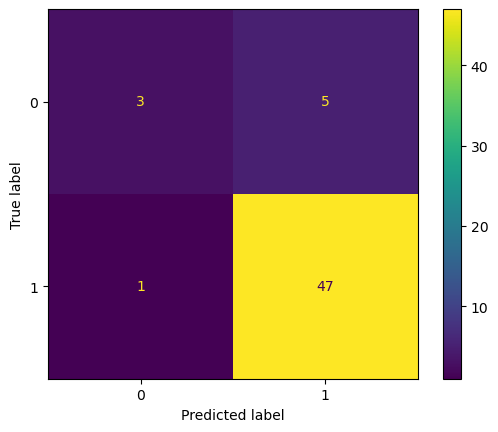

In [29]:
# XGBoost Model
xgb = XGBClassifier(random_state=42)
xgb_params = {
    "n_estimators": [100, 200, 500],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.1, 0.01, 0.001]
}
xgb_grid = GridSearchCV(xgb, xgb_params, cv=5, scoring="accuracy")
xgb_grid.fit(X_train, y_train)
xgb_best = xgb_grid.best_estimator_
y_pred_xgb = xgb_best.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Precision:", precision_score(y_test, y_pred_xgb))
print("XGBoost Recall:", recall_score(y_test, y_pred_xgb))
print("XGBoost F1-score:", f1_score(y_test, y_pred_xgb))
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("XGBoost Confusion Matrix:")
xgb_cm = confusion_matrix(y_test, y_pred_xgb)
xgb_disp = ConfusionMatrixDisplay(confusion_matrix=xgb_cm)
xgb_disp.plot()

### Most important features in XGB

Feature Importances:
1. ALLERGY (0.202385)
2. PEER_PRESSURE (0.117451)
3. ALCOHOL_CONSUMING (0.107563)
4. FATIGUE (0.088416)
5. WHEEZING (0.082006)
6. SWALLOWING_DIFFICULTY (0.081111)
7. ANXIETY (0.064552)
8. YELLOW_FINGERS (0.053074)
9. CHRONIC_DISEASE (0.052696)
10. CHEST_PAIN (0.044401)
11. GENDER (0.031781)
12. SHORTNESS_OF_BREATH (0.027692)
13. AGE (0.019031)
14. COUGHING (0.015121)
15. SMOKING (0.012719)


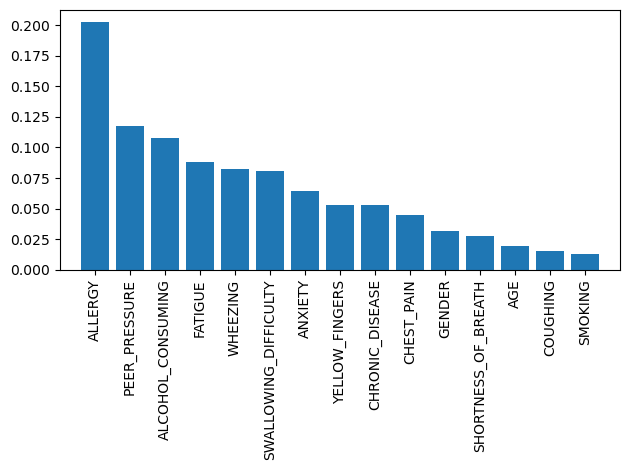

In [45]:
# Get the feature importances
importances = xgb_best.feature_importances_

# Get the names of the features
feature_names = X.columns

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature importances
print("Feature Importances:")
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))
    
# Sort the importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the variable importances
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), variable_names[indices], rotation=90)
plt.xlim([-1, len(importances)])
plt.tight_layout()
plt.show()

### Assigning risk scores to patients based on predicted probabilities from XGB

In [30]:
# Predict probabilities for the test set
xgb_probabilities = xgb_best.predict_proba(X_test)

# Calculate risk scores for the test set
xgb_risk_scores = [calculate_risk_score(prob) for prob in xgb_probabilities]

# Get the actual values of "LUNG_CANCER" for the first 10 patients in the test set
actual_lung_cancer_xgb = y_test[:10].tolist()

# Print the risk scores and actual "LUNG_CANCER" values for the first 10 patients
print("XGBoost Risk Scores:")
for i in range(10):
    print(f"Patient {i+1}: Probability = {xgb_risk_scores[i][0]}, Risk Category = {xgb_risk_scores[i][1]}, Actual Lung Cancer = {actual_lung_cancer_xgb[i]}")

XGBoost Risk Scores:
Patient 1: Probability = 0.9775846600532532, Risk Category = High Risk, Actual Lung Cancer = 1
Patient 2: Probability = 0.9726433157920837, Risk Category = High Risk, Actual Lung Cancer = 1
Patient 3: Probability = 0.9427878856658936, Risk Category = High Risk, Actual Lung Cancer = 1
Patient 4: Probability = 0.9933772683143616, Risk Category = High Risk, Actual Lung Cancer = 1
Patient 5: Probability = 0.8073779344558716, Risk Category = High Risk, Actual Lung Cancer = 0
Patient 6: Probability = 0.9577101469039917, Risk Category = High Risk, Actual Lung Cancer = 1
Patient 7: Probability = 0.9832395911216736, Risk Category = High Risk, Actual Lung Cancer = 1
Patient 8: Probability = 0.9637102484703064, Risk Category = High Risk, Actual Lung Cancer = 1
Patient 9: Probability = 0.9847689867019653, Risk Category = High Risk, Actual Lung Cancer = 1
Patient 10: Probability = 0.9484269618988037, Risk Category = High Risk, Actual Lung Cancer = 1


### Top 10 association rules generated from the Apriori algorithm based on lift

In [31]:
# Create a new DataFrame with only positive lung cancer cases
df_positive = df[df["LUNG_CANCER"] == 1]
warnings.filterwarnings('ignore')
# Convert 'AGE' into discrete categories
age_bins = [0, 30, 40, 50, 60, 70, 80, np.inf]
age_labels = ['0-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+']
df_positive['AGE_GROUP'] = pd.cut(df_positive['AGE'], bins=age_bins, labels=age_labels)

# Select relevant columns for association rules analysis
columns_to_encode = ['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
                     'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
                     'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
                     'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'AGE_GROUP']

# Convert the selected columns into a one-hot encoded format
df_encoded = pd.get_dummies(df_positive[columns_to_encode])

# Generate frequent itemsets using Apriori algorithm
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)

# Generate association rules from frequent itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Set the maximum column width to display all variables fully
pd.set_option('display.max_colwidth', None)

# Display the top 10 association rules
print("Top 10 Association Rules:")
print(rules[['antecedents', 'consequents', 'lift']].sort_values("lift", ascending=False).head(10))

Top 10 Association Rules:
                                                     antecedents  \
22258                         (PEER_PRESSURE, WHEEZING, ANXIETY)   
22195  (GENDER, YELLOW_FINGERS, COUGHING, SWALLOWING_DIFFICULTY)   
22681   (FATIGUE, YELLOW_FINGERS, GENDER, SWALLOWING_DIFFICULTY)   
22656     (SHORTNESS_OF_BREATH, PEER_PRESSURE, SMOKING, ANXIETY)   
22208         (YELLOW_FINGERS, PEER_PRESSURE, WHEEZING, ANXIETY)   
22245                  (GENDER, COUGHING, SWALLOWING_DIFFICULTY)   
22206  (GENDER, YELLOW_FINGERS, WHEEZING, SWALLOWING_DIFFICULTY)   
22247                         (PEER_PRESSURE, ANXIETY, COUGHING)   
22113              (SHORTNESS_OF_BREATH, PEER_PRESSURE, ANXIETY)   
22088   (FATIGUE, YELLOW_FINGERS, GENDER, SWALLOWING_DIFFICULTY)   

                                                     consequents      lift  
22258  (GENDER, YELLOW_FINGERS, COUGHING, SWALLOWING_DIFFICULTY)  5.187446  
22195                         (PEER_PRESSURE, WHEEZING, ANXIETY)  5.187

#### Antecedents: 
Combination of factors that form the left side of the association rule. For example, the first rule has the antecedents (ANXIETY, WHEEZING, PEER_PRESSURE), meaning that these three factors occur together in the dataset
#### Consequents: 
Factors that form on the right side of the association rule

### Summary of model results

**Random Forest Model**

The random forest model achieved precision of 94%, recall of 96%, f1-score of 95%, and accuracy of 91%, on the test set.


**Multivariate Adaptive Regression Splines (MARS) Model**

The MARS model achieved precision of 92%, recall of 98%, f1-score of 95%, and accuracy of 91%, on the test set. 


**Extreme Gradient Boosting (XGBoost) Regression Model**

The XGBoost model achieved precision of 90%, recall of 98%, f1-score of 94%, and accuracy of 89%, on the test set. 


In cancer diagnosis, the most important evaluation metric to consider would be recall, which gives the percentage of actual postive cases that the model was correctly able to classify as positive. With recall scores of 96% for the random forest model and 98% for the MARS and XGBoost models, the models are excellent at correctly diagnosing lung cancer.

### Conclusion, Recommendations

All 3 selected models are extremely accurate in diagnosing lung cancer based on a patient's demographics, symptoms and lifestyle choices. The models also provide a personalised risk score for each patient based on their specific characteristics and risk factors. Assigning a risk score to each patient based on the predicted probabilities of a positive case can help healthcare providers prioritise high-risk patients for further diagnostic tests and interventions, improving the speed and accuracy of diagnosis. Identifying high-risk individuals early on enables earlier detection of lung cancer, improving patient outcomes.

## Using k-fold cross-validation to check for overfitting

In [32]:
# Define the model
model = RandomForestClassifier(random_state=42)

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.92857143 0.92857143 0.85714286 0.85714286 0.82142857 0.92857143
 0.85185185 0.96296296 0.92592593 0.88888889]
Mean cross-validation score: 0.8951058201058201


In [33]:
# Create a pipeline to handle missing values and apply the MARS model
imputer = IterativeImputer(random_state=42)
mars_model = Earth()

pipeline = Pipeline([
    ('imputer', imputer),
    ('mars', mars_model)
])

# Create a StratifiedKFold object for stratified cross-validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform stratified cross-validation
cv_scores = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    score = roc_auc_score(y_test, y_pred)
    cv_scores.append(score)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", sum(cv_scores) / len(cv_scores))

Cross-validation scores: [0.921875, 0.984375, 1.0, 0.96875, 0.9635416666666667, 0.765625, 0.9722222222222222, 0.9791666666666667, 0.9347826086956521, 0.9130434782608696]
Mean cross-validation score: 0.9403381642512076


In [34]:
# Define the XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Perform cross-validation
xgb_scores = cross_val_score(xgb_model, X, y, cv=10, scoring='accuracy')
print("XGBoost Cross-validation scores:", xgb_scores)
print("XGBoost Mean cross-validation score:", xgb_scores.mean())

XGBoost Cross-validation scores: [0.89285714 0.85714286 0.89285714 0.82142857 0.89285714 0.89285714
 0.81481481 1.         0.88888889 0.85185185]
XGBoost Mean cross-validation score: 0.8805555555555555


### K-fold cross-validation Results
Consistently high cross-validation scores with mean scores of above 88% for all 3 models suggests that the models are performing well and have good predictive accuracy.

The consistency of the scores suggests that your model is not overfitting to any particular subset of the data and is able to generalise well to unseen data